In [2]:
import matplotlib.pyplot as pp
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import os
import seaborn as sns
import matplotlib.image as mpimg

In [3]:
target=[]
images=[]
flat_data=[]

In [4]:
datadir = ('/content/drive/MyDrive/rice-leaf/rice/train')

In [5]:
categories = ['bacterial_leaf_blight','brownspot','blast']
for category in categories:
    class_num = categories.index(category)
    path = os.path.join(datadir,category)
    
    for img in os.listdir(path):
        img_array = imread(os.path.join(path,img))
        img_resized = resize(img_array,(150,150,3))
        flat_data.append(img_resized.flatten())
        images.append(img_resized)
        target.append(class_num)

In [6]:
flat_data=np.array(flat_data)

In [7]:
target=np.array(target)

In [8]:
images=np.array(images)

In [9]:
f_d = np.asarray(flat_data)
t = np.asarray(target)
im = np.asarray(images)

In [10]:
print(f_d.shape, t.shape, im.shape)

(157, 67500) (157,) (157, 150, 150, 3)


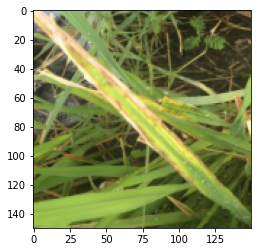

In [11]:
pp.imshow(im[2])

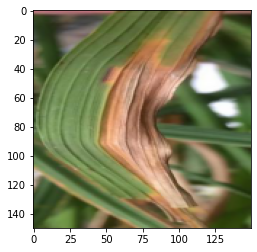

In [12]:
pp.imshow(im[26])

In [13]:
#split data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.2,random_state =0)

In [14]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
linear = LinearRegression()
linear.fit(x_train,y_train)

LinearRegression()

In [16]:
len(x_train)

125

In [17]:
print(x_train)

[[0.56078431 0.65784314 0.30686275 ... 0.14901961 0.25882353 0.03039216]
 [0.81470588 0.82254902 0.81764706 ... 0.90980392 0.90980392 0.90196078]
 [0.19411765 0.38823529 0.06078431 ... 0.41078431 0.63431373 0.33235294]
 ...
 [0.55490196 0.54313725 0.50784314 ... 0.70784314 0.72156863 0.72745098]
 [0.37941176 0.54509804 0.25490196 ... 0.70686275 0.70686275 0.69901961]
 [0.4245098  0.55       0.29509804 ... 0.36862745 0.48529412 0.25196078]]


In [18]:
len(y_train)

125

In [19]:
print(y_train)

[0 1 1 0 1 1 2 1 0 1 1 1 0 1 0 2 1 0 1 0 2 0 1 1 2 2 2 2 1 1 1 2 1 1 2 0 1
 1 2 1 1 0 0 0 1 1 0 0 1 0 1 0 2 2 0 1 1 1 1 0 1 0 1 1 2 0 0 1 1 0 1 0 1 2
 0 1 0 2 0 1 0 0 1 2 2 0 0 0 1 1 1 0 0 1 1 0 1 1 2 0 0 1 1 1 1 2 1 1 0 1 2
 2 0 1 2 1 1 1 0 0 0 1 1 1 0]


In [20]:
len(x_test)

32

In [21]:
print(x_test)

[[0.50980392 0.63823529 0.21078431 ... 0.46960784 0.57058824 0.22254902]
 [0.07058824 0.10588235 0.01176471 ... 0.55294118 0.69411765 0.30392157]
 [0.67647059 0.68431373 0.68039216 ... 0.77843137 0.78627451 0.78039216]
 ...
 [0.61372549 0.61372549 0.61372549 ... 0.69215686 0.7        0.69607843]
 [0.9        0.92156863 0.47745098 ... 0.53039216 0.71568627 0.32745098]
 [0.44313725 0.49803922 0.51862745 ... 0.90196078 0.90784314 0.90784314]]


In [22]:
len(y_test)

32

In [23]:
print(y_test)

[0 0 1 1 1 1 1 1 1 1 0 2 0 1 1 2 1 1 2 1 0 0 1 0 0 0 1 0 1 1 0 1]


In [24]:
y_pred = linear.predict(x_test)

In [25]:
linear.score(x_test,y_test)

-0.3414634876389713

In [26]:
y_pred

array([ 5.50769989e-01,  7.93860084e-01,  9.56259718e-01,  7.70879876e-01,
        9.89863531e-01,  1.09352789e+00,  8.13318811e-01,  9.30287895e-01,
        8.07401983e-01,  8.59557552e-01,  5.95325994e-01,  1.46141048e+00,
        9.99842270e-01,  7.51674299e-01,  8.12003008e-01,  5.27051944e-01,
        9.86369123e-01,  9.81294541e-01, -8.79918417e-02,  9.01584895e-01,
        5.50769989e-01,  3.47151722e-01,  1.06191879e+00,  7.91744185e-01,
        1.15910955e+00,  9.35739238e-01,  9.98762538e-01,  1.72336484e+00,
        3.64211391e-01,  7.73846044e-01,  2.44249065e-15,  8.43593156e-01])

In [27]:
r2_score(y_pred, y_test)

-3.1331181136697444

In [28]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [29]:
model.fit(x_train,y_train)

GaussianNB()

In [30]:
model.score(x_test,y_test)

0.84375

In [31]:
y1_pred = linear.predict(x_test)

In [32]:
y1_pred

array([ 5.50769989e-01,  7.93860084e-01,  9.56259718e-01,  7.70879876e-01,
        9.89863531e-01,  1.09352789e+00,  8.13318811e-01,  9.30287895e-01,
        8.07401983e-01,  8.59557552e-01,  5.95325994e-01,  1.46141048e+00,
        9.99842270e-01,  7.51674299e-01,  8.12003008e-01,  5.27051944e-01,
        9.86369123e-01,  9.81294541e-01, -8.79918417e-02,  9.01584895e-01,
        5.50769989e-01,  3.47151722e-01,  1.06191879e+00,  7.91744185e-01,
        1.15910955e+00,  9.35739238e-01,  9.98762538e-01,  1.72336484e+00,
        3.64211391e-01,  7.73846044e-01,  2.44249065e-15,  8.43593156e-01])

In [58]:
r2_score(y_test, y1_pred)

-0.3414634876389713

In [34]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
linear1 = DecisionTreeClassifier(criterion='entropy', random_state=0)

In [35]:
linear1.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [56]:
y_pred_dt = linear1.predict(x_test)
y_pred_dt

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 2, 1, 1, 0, 1])

In [57]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_dt)
r2_score(y_test , y_pred_dt)

-0.16666666666666674

In [52]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

In [39]:
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred2= classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred2)
print(cm)
accuracy_score(y_test, y_pred2)

[[ 8  1  2]
 [ 0 18  0]
 [ 1  2  0]]


0.8125

In [41]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

In [42]:
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred3 = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred3)
print(cm)
accuracy_score(y_test, y_pred3)

[[ 1 10  0]
 [ 0 18  0]
 [ 0  3  0]]


0.59375

In [44]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)

In [45]:
classifier.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=0)

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred4 = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred4)
print(cm)
accuracy_score(y_test, y_pred4)

[[ 7  2  2]
 [ 0 18  0]
 [ 1  1  1]]


0.8125

(array([ 3377., 32753., 55038., 56835., 36497., 24505., 20989., 14331.,
        12304., 13371.]),
 array([  2. ,  27.3,  52.6,  77.9, 103.2, 128.5, 153.8, 179.1, 204.4,
        229.7, 255. ]),
 <a list of 10 Patch objects>)

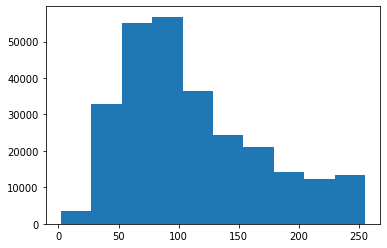

In [47]:
pp.hist(img_array.ravel())

(array([ 545864., 1174822., 1529248., 1649659., 1574288., 1701682.,
        1289841.,  683184.,  339149.,  109763.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

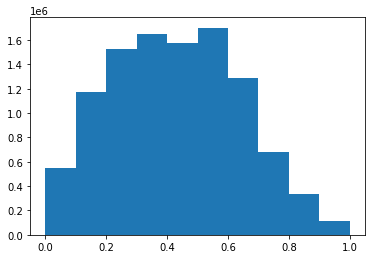

In [48]:
pp.hist(f_d.ravel())

(array([53.,  0.,  0.,  0.,  0., 79.,  0.,  0.,  0., 25.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

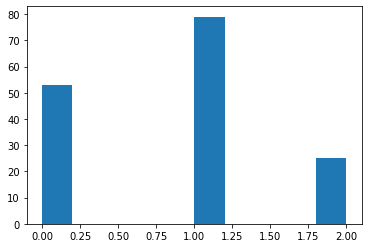

In [49]:
pp.hist(t.ravel())

(array([ 545864., 1174822., 1529248., 1649659., 1574288., 1701682.,
        1289841.,  683184.,  339149.,  109763.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

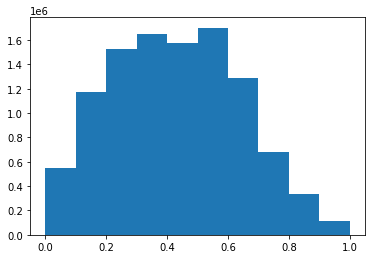

In [50]:
pp.hist(im.ravel())

In [59]:
batch_size = [2,4,6,8,10,12]
accuracy = [-3.13, -0.34, -0.16, 0.81, 0.59, 0.81]

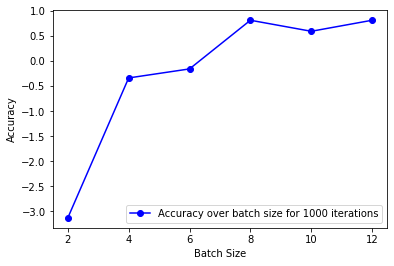

In [63]:
pp.xlabel('Batch Size')
pp.ylabel('Accuracy')
pp.plot(batch_size,accuracy,'b-o',label='Accuracy over batch size for 1000 iterations');
pp.legend()
pp.show()